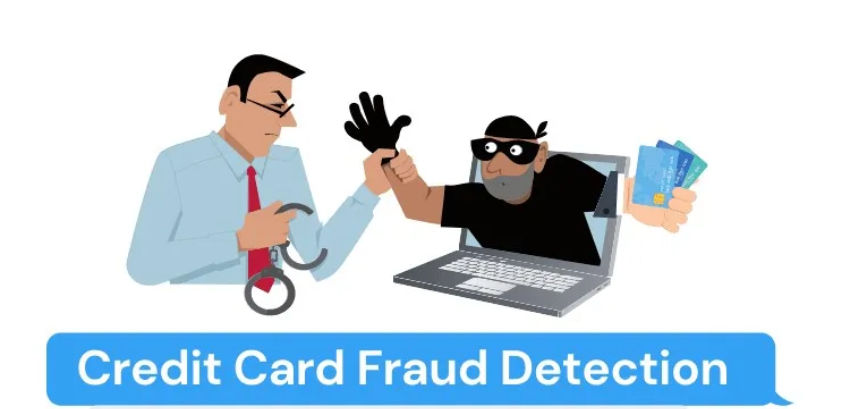

# CREDIT CARD FRAUD DETECTION 

## Introduction to Credit Card Fraud Detection
Credit card fraud poses a significant threat to both financial institutions and cardholders, leading to substantial financial losses and potential harm to individuals. In response to this challenge, advanced technologies and machine learning techniques have been employed to develop robust fraud detection systems.

## The Importance of Fraud Detection

#### Financial Loss Prevention: 
Fraudulent transactions result in financial losses for both credit card companies and their customers. Early detection allows for prompt action to mitigate these losses.

#### Customer Trust and Satisfaction:
Rapid detection and response to fraud contribute to maintaining customer trust. Prompt resolution of fraudulent activities enhances overall customer satisfaction.

#### Regulatory Compliance:
Financial institutions are subject to various regulations aimed at protecting consumers. Implementing effective fraud detection systems helps ensure compliance with these regulations.

## Dataset Overview:

The dataset comprises simulated credit card transactions, encompassing both genuine and fraudulent activities. The data is presented in CSV format, sourced from the Kaggle public dataset. Generated using the Sparkov Data Generation tool developed by Brandon Harris, the dataset spans from January 1, 2019, to December 31, 2020.               
link for the datset :- https://www.kaggle.com/datasets/kartik2112/fraud-detection/data

### Key Characteristics:

#### Transaction Volume: 
Approximately 1.3 million transactions are recorded in the dataset, involving 1000 customers and 800 merchants.

#### Features:
The dataset incorporates 21 features, providing diverse insights into each transaction. Key features include cc_num (credit card number), merchant, category, amount, gender, city_population, job, date of birth, is_fraud, city, state, zip, and others.


## Features in the Dataset:

1. trans_date_trans_time: Date and time of the transaction.
2. cc_num: Credit card number (potentially masked for privacy).

3. merchant: Name or identifier of the merchant involved.

4. category: Categorization of the transaction (e.g., retail, dining).

5. amt: Transaction amount.

6. gender: Gender of the cardholder.

7. city_pop: Population of the city where the cardholder is located.

8. job: Occupation or job of the cardholder.

9. dob: Date of birth of the cardholder.

10. is_fraud: Binary indicator (0 or 1) for fraudulent transactions.

#### These features play a crucial role in understanding and analyzing the dataset. They include transaction details, cardholder demographics, and a key indicator for fraud detection. Exploring relationships and patterns within these features is essential for deriving meaningful insights and building effective machine learning models.

11. first and last: The first and last name of the cardholder, providing personal identification details.

12. street: Street address of the cardholder, contributing to location specifics.

13. city, state, zip: Geographic details of the cardholder's residence, offering a comprehensive location profile.

14. lat and long: Latitude and longitude coordinates of the cardholder's and merchant's locations, enabling spatial analysis.

15. trans_num: Transaction number or identifier, aiding in unique transaction identification.

16. unix_time: Transaction time represented in Unix timestamp format, facilitating time-based analysis.

17. merch_lat and merch_long: Latitude and longitude coordinates of the merchant's location, essential for understanding transaction geographics.

#### These additional columns provide detailed information about the cardholder's residence, transaction-specific identifiers, and geographical  coordinates crucial for spatial analysis. Including these features in your analysis can contribute to a more comprehensive understanding of the dataset.



### Step 1:- Importing the necessary libraries.

In [1]:
!pip install pandas

In [1]:
# Basic Libraries. 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import plotly.express as px

#Sampling methods
from sklearn.model_selection import train_test_split, cross_val_score

#Oversamplying
from imblearn.over_sampling import RandomOverSampler

#feature engineering
import datetime as dt
from sklearn.preprocessing import MinMaxScaler

#Feature Selection
from boruta import BorutaPy

#Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings("ignore")

In [3]:
crd = pd.read_csv('fraudTrain.csv')
crd_test = pd.read_csv('fraudTest.csv')

print(f'Train Shape = {crd.shape}, Test Shape = {crd_test.shape}')

Train Shape = (1296675, 23), Test Shape = (555719, 23)


In [4]:
crd.head(3)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0


In [5]:
crd_test.head(3)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0


In [6]:
print("Train Column names:", crd.columns.tolist())
print("Test Column names:", crd_test.columns.tolist())

Train Column names: ['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud']
Test Column names: ['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud']


In [7]:
# Checking the information for training set
crd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [8]:
# Checking the information for testing set
crd_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [9]:
# Checking for Summary statistics.
crd.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


### Checking for Duplicates 

In [10]:
crd[crd.duplicated()]

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud


## Summary Statistics Interpretation:

### Transaction Amount (amt):

The transaction amounts vary widely, ranging from 1 to 28,948.90 USD.
The average transaction amount is 70.35 USD, with a standard deviation of 160.32 USD.             
Notably, 75% of transactions have amounts below 83.14 USD.
### ZIP Code (zip):

ZIP codes exhibit diverse values, with a average of 48,800.07.
Transactions span various geographical locations based on ZIP codes.
### Geographic Coordinates (lat and long):

Latitude (lat) and longitude (long) represent cardholders' locations.
The average latitude is approximately 38.54, and the average longitude is about -90.23.
These coordinates demonstrate a broad geographical spread of transactions.
### City Population (city_pop):

City populations vary significantly, with a average of 88,824.44 and a maximum of 2,906,700.
### Transaction Time (unix_time):

Transaction times span from January 1, 2019, to December 31, 2020, in Unix timestamp format.
### Merchant Coordinates (merch_lat and merch_long):

Latitude and longitude for merchants show similar mean values to cardholders.
### Fraud Indicator (is_fraud):

The dataset indicates a binary fraud indicator (0 or 1).
The average fraud rate is approximately 0.58%, suggesting a class imbalance.
75% of transactions are non-fraudulent (is_fraud = 0), and the maximum fraud rate is 100%.
### Overall:

The dataset provides a comprehensive view of transaction characteristics.
Class imbalance in the fraud indicator needs attention during model development.
Geographic spread and transaction amounts vary widely, requiring consideration in fraud detection strategies.
Further exploratory data analysis (EDA) and visualization can uncover additional insights and patterns in the data.

In [11]:
# Checking for missing values for both training and testing set

train_miss = crd.isnull().sum()
train_miss[train_miss>0]

Series([], dtype: int64)

In [12]:
test_miss = crd_test.isnull().sum()
test_miss[test_miss>0]

Series([], dtype: int64)

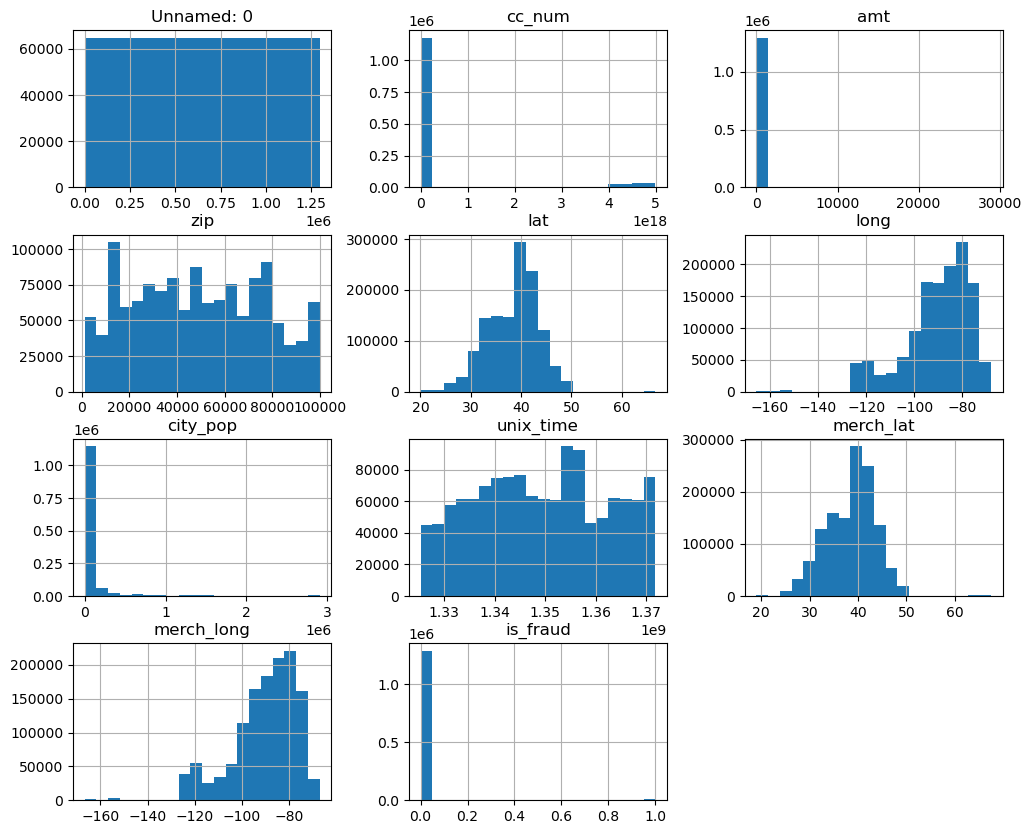

In [13]:
crd.hist(figsize=(12, 10), bins=20)
plt.show()

In [14]:
pd.set_option('display.max_columns', None)
crd.head(3)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0


### Analyzing numerical features

Featuer Name = amt


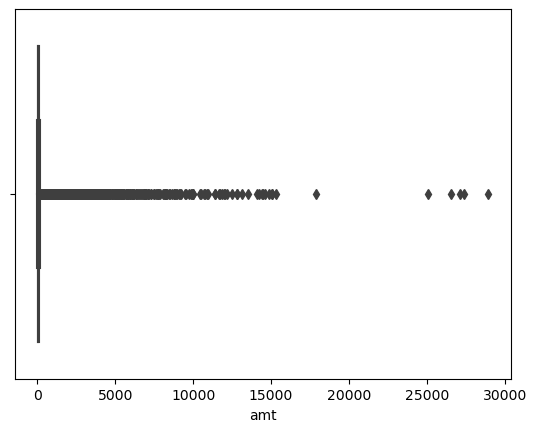

count    1.296675e+06
mean     7.035104e+01
std      1.603160e+02
min      1.000000e+00
25%      9.650000e+00
50%      4.752000e+01
75%      8.314000e+01
max      2.894890e+04
Name: amt, dtype: float64

Featuer Name = city_pop


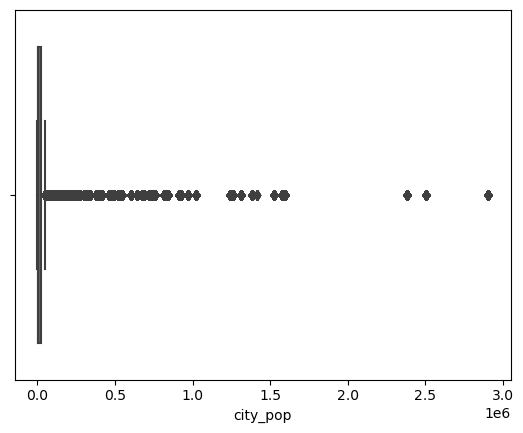

count    1.296675e+06
mean     8.882444e+04
std      3.019564e+05
min      2.300000e+01
25%      7.430000e+02
50%      2.456000e+03
75%      2.032800e+04
max      2.906700e+06
Name: city_pop, dtype: float64

In [15]:
num_cols = ['amt','city_pop']

for i in num_cols:
    print(f'Featuer Name = {i}')
    sns.boxplot(x = crd[i])
    plt.show()
    display(crd[i].describe())

### Analyzing for Categorical features

In [16]:
cat_cols = ["merchant","category","street","city",'state','job']

for i in cat_cols:
    print(crd[i].value_counts())
    print(f'There are totaly {crd[i].nunique()} unique {i}')
    print()

merchant
fraud_Kilback LLC                       4403
fraud_Cormier LLC                       3649
fraud_Schumm PLC                        3634
fraud_Kuhn LLC                          3510
fraud_Boyer PLC                         3493
                                        ... 
fraud_Douglas, DuBuque and McKenzie      775
fraud_Treutel-King                       775
fraud_Medhurst, Labadie and Gottlieb     759
fraud_Reichert-Weissnat                  753
fraud_Hahn, Douglas and Schowalter       727
Name: count, Length: 693, dtype: int64
There are totaly 693 unique merchant

category
gas_transport     131659
grocery_pos       123638
home              123115
shopping_pos      116672
kids_pets         113035
shopping_net       97543
entertainment      94014
food_dining        91461
personal_care      90758
health_fitness     85879
misc_pos           79655
misc_net           63287
grocery_net        45452
travel             40507
Name: count, dtype: int64
There are totaly 14 unique categor

### Analyze Fraudulent vs non-fraudulent transaction.

In [17]:
fraudulent_transactions = crd[crd["is_fraud"] == 1]
non_fraudulent_transactions = crd[crd["is_fraud"] == 0]

display(fraudulent_transactions["amt"].describe())
display(non_fraudulent_transactions["amt"].describe())

count    7506.000000
mean      531.320092
std       390.560070
min         1.060000
25%       245.662500
50%       396.505000
75%       900.875000
max      1376.040000
Name: amt, dtype: float64

count    1.289169e+06
mean     6.766711e+01
std      1.540080e+02
min      1.000000e+00
25%      9.610000e+00
50%      4.728000e+01
75%      8.254000e+01
max      2.894890e+04
Name: amt, dtype: float64

In [18]:
crd.shape[0] - 7506

1289169

In [19]:
crd[crd.city_pop == crd.city_pop.max()]['city'].unique()

array(['Houston'], dtype=object)

### Transaction Amount (amt):

=>There is a wide range of transaction amounts, with a minimum of 1 and a maximum of 28,948.90.

=>The average transaction amount is 70.35, with a standard deviation of 160.32.

=>The median (50th percentile) transaction amount is 47.52.

### City Population (city_pop):

.The city population associated with transactions also varies significantly.

.The average city population is 88,824, with a standard deviation of 301,956.

.The minimum city population is 23, and the maximum is 2,906,700.

### Merchant Information:

.The data includes transactions from various merchants, with the highest frequency from "fraud_Kilback LLC" (4403 occurrences).

.There are 693 unique merchants in the dataset.

### Transaction Categories:

.The data includes transactions across 14 different categories, with the highest frequency in "gas_transport" (131,659 occurrences).

.The "travel" category has the fewest transactions (40,507 occurrences).

### Street 

The Transactions are happened accross 983 streets, with highest frequency in 0069 Robin Brooks Apt. 695 street.

### City

The transactions are happened accross 894 cities, with highest frequency in Birmingham city (5,617 occurrences)

### States

The transaction are happened accross 51 states, with highest frequency in TX(Texas) followed by NY(New York) (94,876 occurrences)

### Jobs

The more number of transactions are done by Film/video editor job industry with (9,779 occurences) out of 494 various jobs

### Fraudulent Transaction Amount Subset:

There are totally 7,506 fraudulent_transactions are there out of 12,96,675 transaction, and the fraudulent_transactions ranges from 1.06 to 1,376.04.

The Average transaction amount in this fraudulent_transactions is 531.32, with standard deviation of 390.56


### Non-Fraudulent Transaction Amount Subset:

There are totally 1289169 Non-fraudulent_transactions are there out of 12,96,678 transactions, and the non-fraudulent_transactions ranges from 1 to 28,948.90 

The Average transaction amount in this non-fraudulent_transactions is 67.66, wiht standard deviation of 154.

gender
F    54.744867
M    45.255133
Name: proportion, dtype: float64

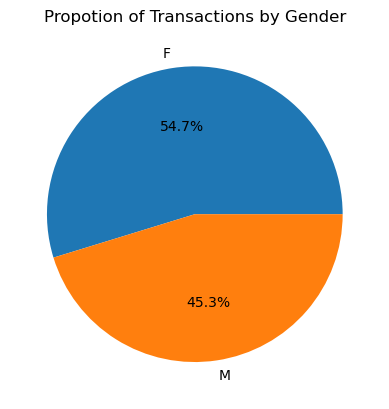

In [20]:
# Count the number of transactions for each gender

gender_count = crd['gender'].value_counts()
display(crd['gender'].value_counts(normalize = True) *100)

# Ploting Pie Chart

plt.pie(gender_count,labels = gender_count.index,autopct = '%1.1f%%')
plt.title('Propotion of Transactions by Gender')
plt.show()

The pie chart illustrates the distribution of transactions based on gender. Females customers are made highest transactions approximately 54.7% of transactions where as male has made remaning 45.3% of Transactions. 

In [21]:
crd.groupby('gender')['amt'].mean()

gender
F    70.200324
M    70.533350
Name: amt, dtype: float64

Both male and female have made same average amount that is approximately $70

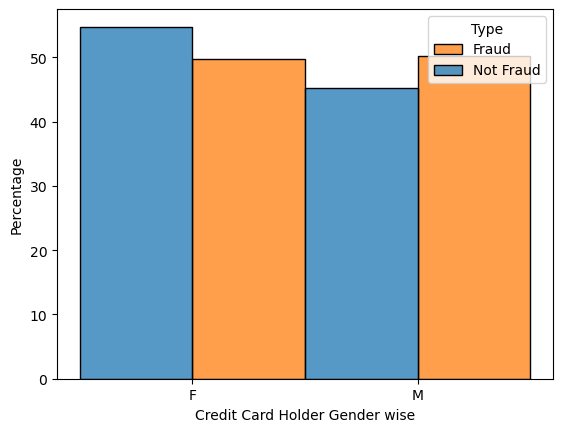

In [22]:
#Gender vs Fraud
sns.histplot(x = 'gender',data = crd,hue = 'is_fraud',stat = 'percent',multiple = 'dodge',common_norm = False)
plt.xlabel('Credit Card Holder Gender wise')
plt.ylabel('Percentage')
plt.legend(title = 'Type',labels = ['Fraud','Not Fraud'])

Male has bit higher fradulent transaction compared to female. 

In this case, we do not see a clear difference between both genders. Data seem to suggest that females and males are almost equally susceptible (50%) to transaction fraud. Gender is not very indicative of a fraudulent transaction.

### Amount

(array([1.296299e+06, 2.730000e+02, 5.400000e+01, 2.300000e+01,
        1.500000e+01, 5.000000e+00, 1.000000e+00, 0.000000e+00,
        1.000000e+00, 4.000000e+00]),
 array([1.000000e+00, 2.895790e+03, 5.790580e+03, 8.685370e+03,
        1.158016e+04, 1.447495e+04, 1.736974e+04, 2.026453e+04,
        2.315932e+04, 2.605411e+04, 2.894890e+04]),
 <BarContainer object of 10 artists>)

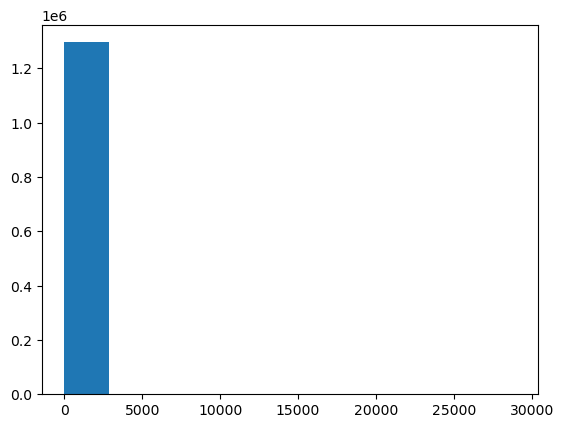

In [23]:
plt.hist(crd.amt)

<Axes: xlabel='amt'>

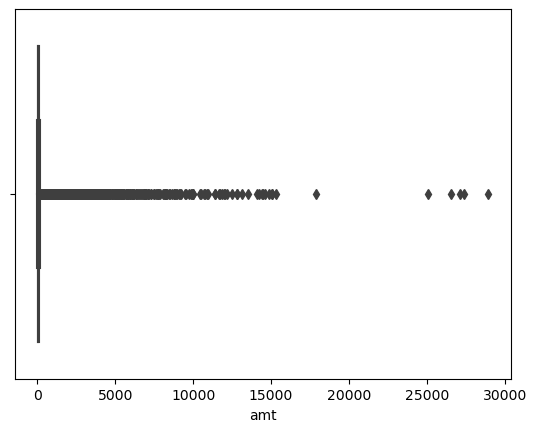

In [24]:
sns.boxplot(x = crd.amt)

In [25]:
crd.amt.describe()

count    1.296675e+06
mean     7.035104e+01
std      1.603160e+02
min      1.000000e+00
25%      9.650000e+00
50%      4.752000e+01
75%      8.314000e+01
max      2.894890e+04
Name: amt, dtype: float64

We can see that most of the transaction amount that has been fallowing less than $1000

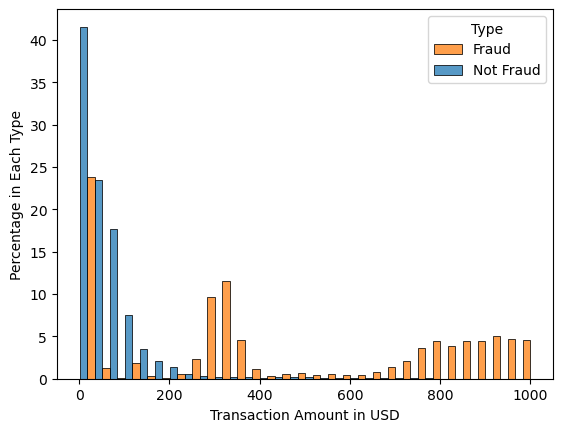

In [26]:
sns.histplot(x = 'amt',data = crd[crd.amt<=1000],hue = 'is_fraud',stat = 'percent',multiple = 'dodge',common_norm = False,bins = 30)
plt.xlabel('Transaction Amount in USD')
plt.ylabel('Percentage in Each Type')
plt.legend(title = 'Type', labels = ['Fraud','Not Fraud'])

**We can see that the results are quite interesting! While the normal transactions tends to be around \$200 or less**

**We can see that the fraudulent transactions peak around \$300 and then at the \$800 to \$1000 range. There is a very clear pattern here!**

In [27]:
crd.head(2)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0


### Spending Category vs Fraud

Now will examine that in which spending categories fraud happens most predominantly.

To do this, we first calculate the distribution in normal transactions and then the distribution in fraudulent activities.
The difference between the 2 distributions will demonstrate which category is most susceptible to fraud. For example, if 'grocery_pos' accounts for 50% of the total in normal transactions and 50% in fraudulent transactions, this doesn't mean that it is a major category for fraud, it simply means it is just a popular spending category in general. However, if the percentage is 10% in normal but 30% in fraudulent, then we know that there is a pattern.

In [28]:
pd.DataFrame(crd[crd['is_fraud']==0]['category'].value_counts(normalize=True)*100).reset_index()

,category,proportion
0,gas_transport,10.164765
1,home,9.534592
2,grocery_pos,9.455316
3,shopping_pos,8.984780
4,kids_pets,8.749512
5,shopping_net,7.433471
6,entertainment,7.274531
7,food_dining,7.082857
8,personal_care,7.022974
9,health_fitness,6.651261


In [29]:
crd[crd['is_fraud']==1]['category'].value_counts(normalize=True)*100

category
grocery_pos       23.221423
shopping_net      22.821743
misc_net          12.190248
shopping_pos      11.231015
gas_transport      8.233413
misc_pos           3.330669
kids_pets          3.184119
entertainment      3.104183
personal_care      2.930989
home               2.637890
food_dining        2.011724
grocery_net        1.785238
health_fitness     1.771916
travel             1.545430
Name: proportion, dtype: float64

In [30]:
nfc = pd.DataFrame(crd[crd['is_fraud']==0]['category'].value_counts(normalize=True)*100).reset_index()
fc = pd.DataFrame(crd[crd['is_fraud']==1]['category'].value_counts(normalize=True)*100).reset_index()
a = pd.merge(nfc,fc,on = 'category')

a.columns = ['category','nfc','fc']
a['diff'] = a['fc'] - a['nfc']
a.sort_values('diff',ascending = False)

,category,nfc,fc,diff
5,shopping_net,7.433471,22.821743,15.388272
2,grocery_pos,9.455316,23.221423,13.766107
11,misc_net,4.838155,12.190248,7.352092
3,shopping_pos,8.984780,11.231015,2.246235
13,travel,3.133104,1.545430,-1.587673
12,grocery_net,3.515288,1.785238,-1.730049
0,gas_transport,10.164765,8.233413,-1.931352
10,misc_pos,6.159394,3.330669,-2.828725
8,personal_care,7.022974,2.930989,-4.091985
6,entertainment,7.274531,3.104183,-4.170348


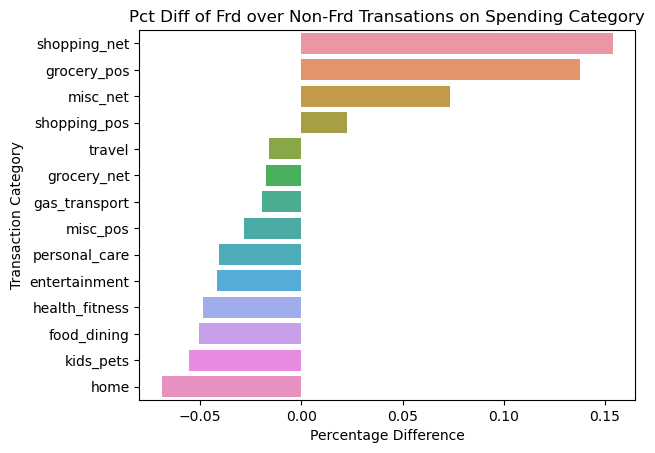

In [32]:
not_fraud_cat = crd[crd['is_fraud']==0]['category'].value_counts(normalize = True).to_frame().reset_index()
not_fraud_cat.columns = ['category','not fraud percentage']

fraud_cat = crd[crd['is_fraud']==1]['category'].value_counts(normalize = True).to_frame().reset_index()
fraud_cat.columns = ['category','fraud percentage']

mix = not_fraud_cat.merge(fraud_cat,on = 'category')
mix['diff'] = mix['fraud percentage'] - mix['not fraud percentage']

sns.barplot(y = 'category',x = 'diff',data = mix.sort_values('diff',ascending = False))
plt.xlabel('Percentage Difference')
plt.ylabel('Transaction Category')
plt.title('Pct Diff of Frd over Non-Frd Transations on Spending Category')
plt.show()

In [33]:
mix

,category,not fraud percentage,fraud percentage,diff
0,gas_transport,0.101648,0.082334,-0.019314
1,home,0.095346,0.026379,-0.068967
2,grocery_pos,0.094553,0.232214,0.137661
3,shopping_pos,0.089848,0.112310,0.022462
4,kids_pets,0.087495,0.031841,-0.055654
5,shopping_net,0.074335,0.228217,0.153883
6,entertainment,0.072745,0.031042,-0.041703
7,food_dining,0.070829,0.020117,-0.050711
8,personal_care,0.070230,0.029310,-0.040920
9,health_fitness,0.066513,0.017719,-0.048793


Some spending categories indeed see more fraud than others! Fraud tends to happen more often in 'Shopping_net', 'Grocery_pos', 'misc_net' and shopping_pos while 'home'and 'kids_pets' among others tend to see more normal transactions than fraudulent ones.

### Age vs Fraud
The older people more prone to credit card fraud? Or is it the other way around? Given the birthday info, we can calculate the age of each card owner (in 2022) and see whether a trend exists.

In [34]:
#2014 - pd.to_datetime(crd['dob']).dt.year

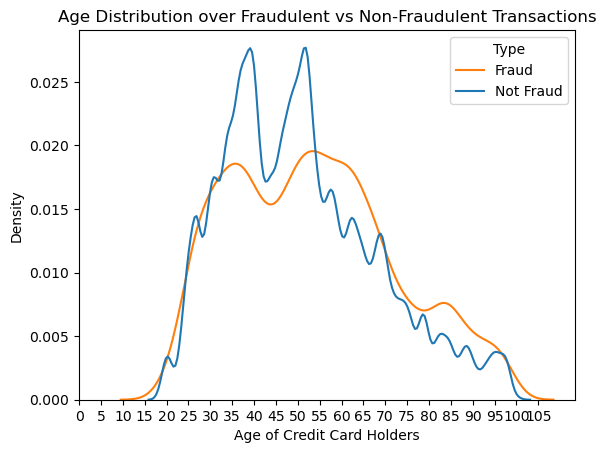

In [35]:
# Creating a new column called age based on dob
crd['age']= dt.date.today().year - pd.to_datetime(crd['dob']).dt.year

sns.kdeplot(x = 'age',data = crd,hue = 'is_fraud',common_norm = False)
plt.xlabel('Age of Credit Card Holders')
plt.ylabel('Density')
plt.xticks(np.arange(0,110,5))
plt.title('Age Distribution over Fraudulent vs Non-Fraudulent Transactions')
plt.legend(title = 'Type', labels = ['Fraud','Not Fraud'])

The age distribution is visibly different between 2 transaction types. In normal transactions, there are 2 peaks at the age of 37-38 and 49-50, while in fraudulent transactions, the age distribution is a little smoother and the second peak does include a wider age group from 50-65. This does suggest that older people are potentially more prone to fraud.

### Cyclicality of Credit Card Fraud
How do fraudulent transactions distribute on the temporal spectrum? Is there an hourly, monthly, or seasonal trend? We can use the transaction time column to answer this question.

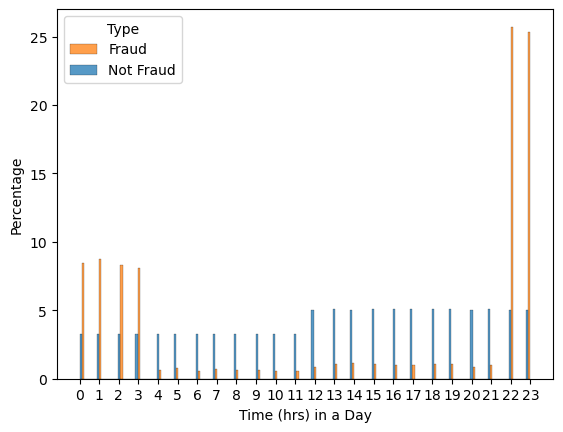

In [36]:
#time in a day vs fraud

crd['hour'] = pd.to_datetime(crd['trans_date_trans_time']).dt.hour
sns.histplot(data=crd, x="hour", hue="is_fraud", common_norm=False,stat='percent',multiple='dodge')
plt.xlabel('Time (hrs) in a Day')
plt.ylabel('Percentage')
plt.xticks(np.arange(0,24,1))
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])
plt.show()

A very sharp contrast! While normal transactions distribute more or less equally throughout the day, fraudulent payments happen disproportionately around midnight when most people are asleep! during 10pm till 3am

### Weekly Trend

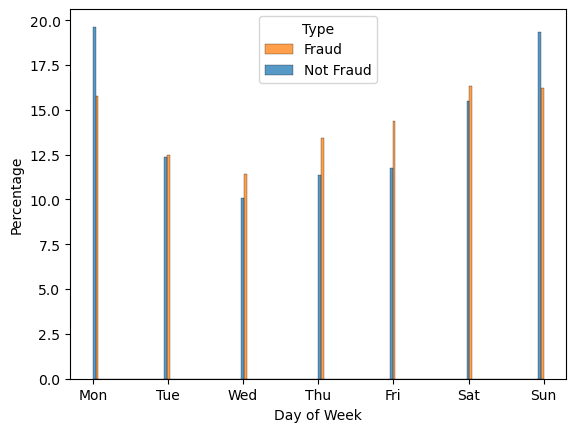

In [37]:
crd['day']=pd.to_datetime(crd['trans_date_trans_time']).dt.dayofweek
ax = sns.histplot(data = crd,x = 'day',hue = 'is_fraud', common_norm = False,stat = 'percent',multiple = 'dodge')
plt.xticks(np.arange(0,7,1))
ax.set_xticklabels([ 'Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
plt.xlabel('Day of Week')
plt.ylabel('Percentage')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

Normal transactions tend to happen more often on Monday and Sunday while fraudulent ones tend to spread out more evenly throughout the week.

## MONTHLY TREND 

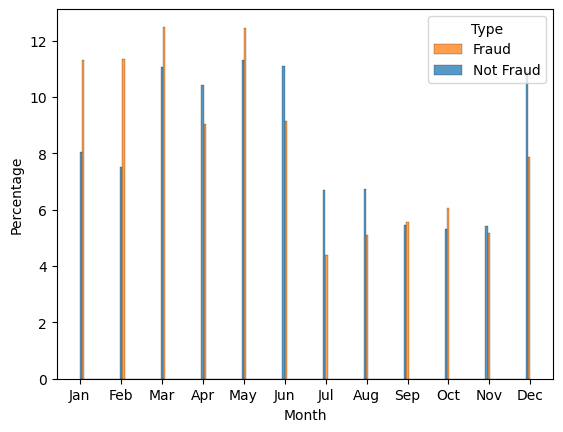

In [38]:
crd['month']=pd.to_datetime(crd['trans_date_trans_time']).dt.month
ax = sns.histplot(data=crd, x="month", hue="is_fraud", common_norm=False,stat='percent',multiple='dodge')
ax.set_ylabel('Percentage')
ax.set_xlabel('Month')
plt.xticks(np.arange(1,13,1))
ax.set_xticklabels(["Jan","Feb","Mar","Apr","May","Jun","Jul",'Aug','Sep','Oct','Nov','Dec'])
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

Very interesting results! While normal payments peak around December (Christmas), and then late spring to early summer, fraudulent transactions are more concentrated in Jan-May. There is a clear seasonal trend.

### State vs Fraud

Now will find the fraudulent transaction over state

Text(0.5, 1.0, 'Percentage of Fraudulent over Non-Fraudulent Transactions in Each State')

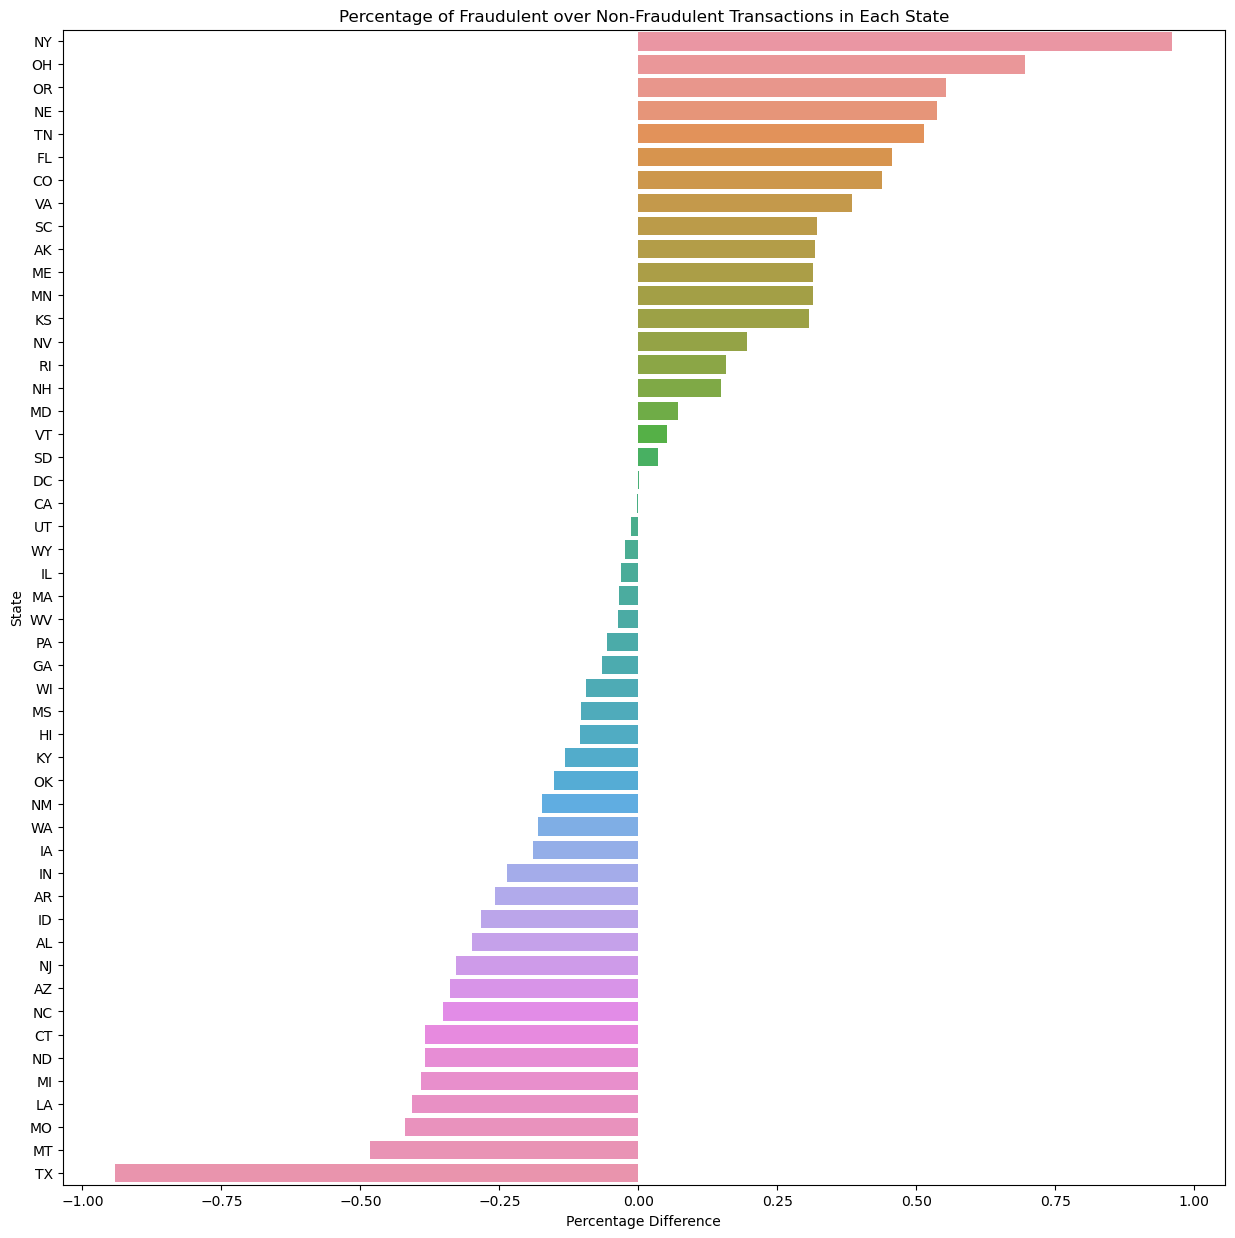

In [39]:
plt.figure(figsize=(15, 15))

a=crd['state'][crd.is_fraud==0].value_counts(normalize=True)
a=a.to_frame()
a=a.reset_index()
a.columns = ['State', 'Per']
b=crd['state'][crd.is_fraud==1].value_counts(normalize=True)
b=b.to_frame()
b=b.reset_index()
b.columns = ['State', 'Per']
merged=a.merge(b,on='State')
merged['diff']=merged['Per_y']-merged['Per_x']
merged['diff']=merged['diff']*100
merged=merged.sort_values('diff',ascending=False)

sns.barplot(data=merged, x='diff',y='State')
plt.xlabel('Percentage Difference')
plt.ylabel('State')
plt.title('Percentage of Fraudulent over Non-Fraudulent Transactions in Each State')

The graph highlights significant variations in the percentage difference between fraudulent and non-fraudulent transactions across different states. States like Wyoming, Delaware, and Nevada exhibit the highest percentage differences, indicating a disproportionately higher occurrence of fraud. In contrast, states such as Vermont, Maine, and New Hampshire show the lowest percentage differences, suggesting lower instances of fraudulent transactions. These insights can guide targeted anti-fraud measures, considering factors like population density and local economic conditions. Further analysis on specific fraud types and regional influences could enhance the effectiveness of preventive strategies.

### Now will perform heat map for numerical features

In [40]:
non_num_cols = ['Unnamed: 0', 'cc_num','zip','hour','day','month']
cols = crd.describe().columns.to_list() 
num_cols = [i  for i in cols if i not in non_num_cols]

<Axes: >

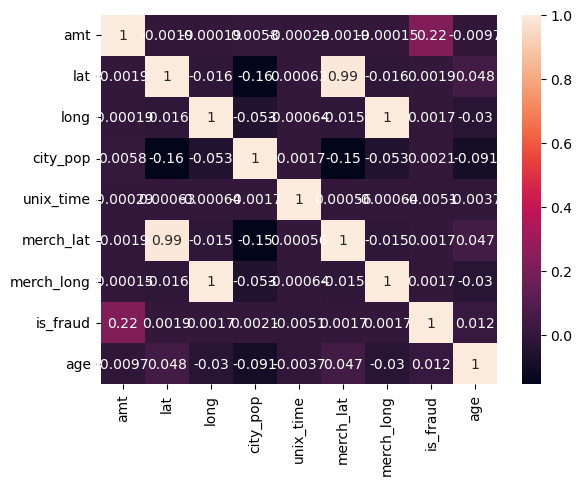

In [41]:
sns.heatmap(crd[num_cols].corr(),annot = True)

we can see that non of them are highly correlated except long and merch_long, lat and murch_lat

In [42]:
#Calculate distance between merchant and home location
crd['latitudinal_distance'] = abs(round(crd['lat'] - crd['merch_lat'],3))
crd['longitudinal_distance'] = abs(round(crd['long'] - crd['merch_long'],3))

In [43]:
crd.head(2)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,age,hour,day,month,latitudinal_distance,longitudinal_distance
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,36,0,1,1,0.068,0.870
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,46,0,1,1,0.271,0.024


In [106]:
crd.shape

(1296675, 29)

In [44]:
drop_cols = crd[['Unnamed: 0','trans_date_trans_time','cc_num','first','last','lat', 'long','merch_lat', 'merch_long','dob','trans_num','merchant','street','city','state','zip','job','unix_time']]

In [45]:
final_features = crd.drop(drop_cols,axis=1)

In [107]:
final_features.shape

(1296675, 11)

In [46]:
final_features.head()

,category,amt,gender,city_pop,is_fraud,age,hour,day,month,latitudinal_distance,longitudinal_distance
0,misc_net,4.97,F,3495,0,36,0,1,1,0.068,0.870
1,grocery_pos,107.23,F,149,0,46,0,1,1,0.271,0.024
2,entertainment,220.11,M,4154,0,62,0,1,1,0.970,0.108
3,gas_transport,45.00,M,1939,0,57,0,1,1,0.804,0.447
4,misc_pos,41.96,M,99,0,38,0,1,1,0.254,0.830


In [47]:
df = pd.get_dummies(final_features,drop_first=True).astype(int)

In [49]:
df.head()

,amt,city_pop,is_fraud,age,hour,day,month,latitudinal_distance,longitudinal_distance,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_M
0,4,3495,0,36,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,107,149,0,46,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,220,4154,0,62,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,45,1939,0,57,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
4,41,99,0,38,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


### Spliting in Training and Testing

In [50]:
X = df.drop('is_fraud',axis = 1)
y = df['is_fraud']

In [51]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size= 0.3,random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((907672, 22), (389003, 22), (907672,), (389003,))

### Model Building

In [52]:
lr_non_oversampled = LogisticRegression()
lr_non_oversampled.fit(X_train, y_train)

LogisticRegression()

In [53]:
from sklearn.metrics import confusion_matrix ,accuracy_score,precision_score,f1_score,recall_score,roc_auc_score,roc_curve
from sklearn.metrics import classification_report


Logistic Regression Classifier :
Accuracy: 0.9938149577252617
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00    386727
           1       0.00      0.00      0.00      2276

    accuracy                           0.99    389003
   macro avg       0.50      0.50      0.50    389003
weighted avg       0.99      0.99      0.99    389003



Text(0.5, 1.0, 'Confusion Matrix- Logistic Regression Classifier ')

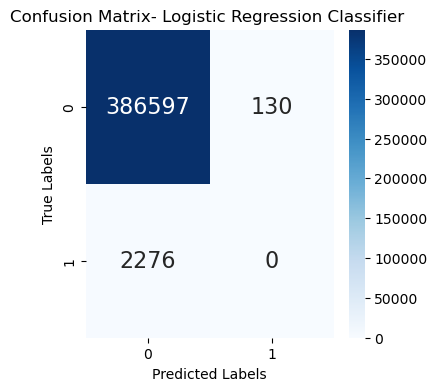

In [55]:
# Predictions
# Make predictions on the non-oversampled test set

y_pred_non_oversampled = lr_non_oversampled.predict(X_test)
y_proba_non_oversampled_lr = lr_non_oversampled.predict_proba(X_test)[:, 1]

# Create confusion matrix for non-oversampled model
accuracy = accuracy_score(y_test, y_pred_non_oversampled)
cm_non_oversampled = confusion_matrix(y_test, y_pred_non_oversampled)
classification_report_result = classification_report(y_test, y_pred_non_oversampled)

# Calculate ROC curve and AUC-ROC score for non-oversampled model
fpr_non_oversampled, tpr_non_oversampled, thresholds_non_oversampled = roc_curve(y_test, y_proba_non_oversampled_lr)
auc_non_oversampled = roc_auc_score(y_test, y_proba_non_oversampled_lr)

# Evaluate the non-oversampled model
print("\nLogistic Regression Classifier :")
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report(y_test, y_pred_non_oversampled))

# Create heatmap for non-oversampled model
plt.figure(figsize=(4, 4))
sns.heatmap(cm_non_oversampled, annot=True, fmt='d', cmap='Blues', annot_kws={'size': 16})
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix- Logistic Regression Classifier ')


In [57]:
386597/389003

0.9938149577252617

In [56]:
y_test.value_counts(normalize=True)*100

is_fraud
0    99.414915
1     0.585085
Name: proportion, dtype: float64

### Observation:-
     
=> Accuracy is approximately 99%      
=>Its not predicting any TP values.        
=>All 2,276 frauds are predicted as non- frauds.          
So its not a good model.      

### DECISION TREE MODEL

In [58]:
# Create and train a Decision Tree classifier on the non-oversampled data
dt_non_oversampled = DecisionTreeClassifier()
dt_non_oversampled.fit(X_train, y_train)

DecisionTreeClassifier()


Decision Tree Classifier :
Accuracy: 0.9978586283396272
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    386727
           1       0.80      0.84      0.82      2276

    accuracy                           1.00    389003
   macro avg       0.90      0.92      0.91    389003
weighted avg       1.00      1.00      1.00    389003



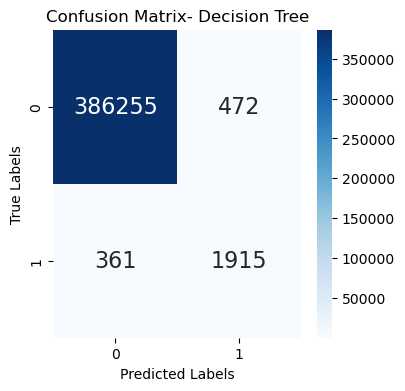

In [59]:
# Predict probabilities on the non-oversampled test set
y_pred_non_oversampled = dt_non_oversampled.predict(X_test)
y_proba_non_oversampled = dt_non_oversampled.predict_proba(X_test)[:, 1]

# Create confusion matrix for non-oversampled model
accuracy = accuracy_score(y_test, y_pred_non_oversampled)
cm_non_oversampled = confusion_matrix(y_test, y_pred_non_oversampled)
classification_report_result = classification_report(y_test, y_pred_non_oversampled)

# Calculate ROC curve and AUC-ROC score for non-oversampled model
fpr_non_oversampled, tpr_non_oversampled, thresholds_non_oversampled = roc_curve(y_test, y_proba_non_oversampled)
auc_non_oversampled = roc_auc_score(y_test, y_proba_non_oversampled)

# Create heatmap for non-oversampled model
plt.figure(figsize=(4, 4))
sns.heatmap(cm_non_oversampled, annot=True, fmt='d', cmap='Blues', annot_kws={'size': 16})
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix- Decision Tree')

# Evaluate the non-oversampled model
print("\nDecision Tree Classifier :")
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report(y_test, y_pred_non_oversampled))

In [60]:
(386255+1915)/389003

0.9978586283396272

### Random Forest classifier

In [61]:
# Create and train a Random Forest classifier on the non-oversampled data
rf_non_oversampled = RandomForestClassifier()
rf_non_oversampled.fit(X_train, y_train)

RandomForestClassifier()


Decision Tree Classifier :
Accuracy: 0.9985964118528649
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    386727
           1       0.97      0.79      0.87      2276

    accuracy                           1.00    389003
   macro avg       0.98      0.89      0.93    389003
weighted avg       1.00      1.00      1.00    389003



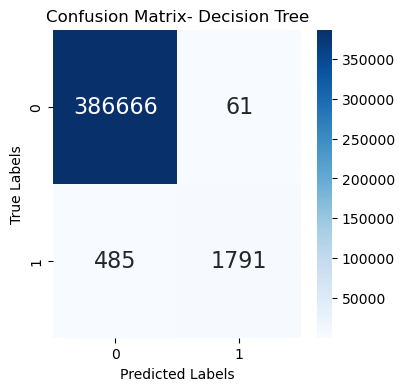

In [62]:
# Predict probabilities on the non-oversampled test set
y_pred_non_oversampled = rf_non_oversampled.predict(X_test)
y_proba_non_oversampled = rf_non_oversampled.predict_proba(X_test)[:, 1]

# Create confusion matrix for non-oversampled model
accuracy = accuracy_score(y_test, y_pred_non_oversampled)
cm_non_oversampled = confusion_matrix(y_test, y_pred_non_oversampled)
classification_report_result = classification_report(y_test, y_pred_non_oversampled)

# Calculate ROC curve and AUC-ROC score for non-oversampled model
fpr_non_oversampled, tpr_non_oversampled, thresholds_non_oversampled = roc_curve(y_test, y_proba_non_oversampled)
auc_non_oversampled = roc_auc_score(y_test, y_proba_non_oversampled)

# Create heatmap for non-oversampled model
plt.figure(figsize=(4, 4))
sns.heatmap(cm_non_oversampled, annot=True, fmt='d', cmap='Blues', annot_kws={'size': 16})
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix- Decision Tree')

# Evaluate the non-oversampled model
print("\nDecision Tree Classifier :")
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report(y_test, y_pred_non_oversampled))

# ROC Curve for all models

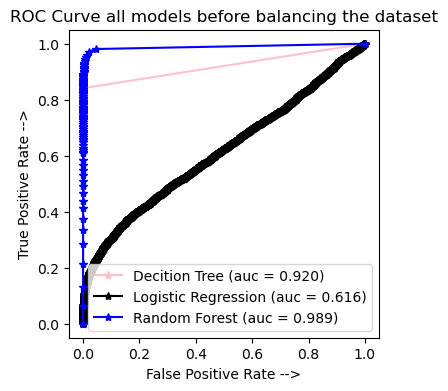

In [63]:
from sklearn.metrics import roc_curve, auc

# Predict probabilities on the non-oversampled test set (Logistic Regression)
y_proba_non_oversampled_lr = lr_non_oversampled.predict_proba(X_test)[:, 1]
# Calculate ROC curve and AUC-ROC score for non-oversampled model
fpr_non_oversampled_lr, tpr_non_oversampled_lr, thresholds_non_oversampled = roc_curve(y_test, y_proba_non_oversampled_lr)
auc_non_oversampled_lr = roc_auc_score(y_test, y_proba_non_oversampled_lr)

# Predict probabilities on the non-oversampled test set (Random Forest)
y_proba_non_oversampled_rf = rf_non_oversampled.predict_proba(X_test)[:, 1]
# Calculate ROC curve and AUC-ROC score for non-oversampled model
fpr_non_oversampled_rf, tpr_non_oversampled_rf, thresholds_non_oversampled = roc_curve(y_test, y_proba_non_oversampled_rf)
auc_non_oversampled_rf = roc_auc_score(y_test, y_proba_non_oversampled_rf)

# Predict probabilities on the non-oversampled test set (Decision Tree)
y_proba_non_oversampled = dt_non_oversampled.predict_proba(X_test)[:, 1]
# Calculate ROC curve and AUC-ROC score for non-oversampled model
fpr_non_oversampled, tpr_non_oversampled, thresholds_non_oversampled = roc_curve(y_test, y_proba_non_oversampled)
auc_non_oversampled = roc_auc_score(y_test, y_proba_non_oversampled)

plt.figure(figsize=(4, 4), dpi=100)
plt.plot(fpr_non_oversampled, tpr_non_oversampled, marker='*',color='pink' ,label='Decition Tree (auc = %0.3f)' % auc_non_oversampled)
plt.plot(fpr_non_oversampled_lr, tpr_non_oversampled_lr, marker='*',color='black' ,label='Logistic Regression (auc = %0.3f)' % auc_non_oversampled_lr)
plt.plot(fpr_non_oversampled_rf, tpr_non_oversampled_rf, marker='*',color='blue' ,label='Random Forest (auc = %0.3f)' % auc_non_oversampled_rf)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')
plt.title('ROC Curve all models before balancing the dataset')
plt.legend(loc='lower right')
plt.legend()
plt.show()


#### We can see that Random Forest is performing better compared to all the different model

### Now will Try to perform Resampling Techniques to Solve Class Imbalance

Imbalance data can hamper our model accuracy big time. It appears in many domains, including fraud detection, spam filtering, disease screening etc.

One of the widely adopted class imbalance techniques for dealing with highly unbalanced datasets is called resampling. It consists of removing samples from the majority class (under-sampling) and/or adding more examples from the minority class (over-sampling).

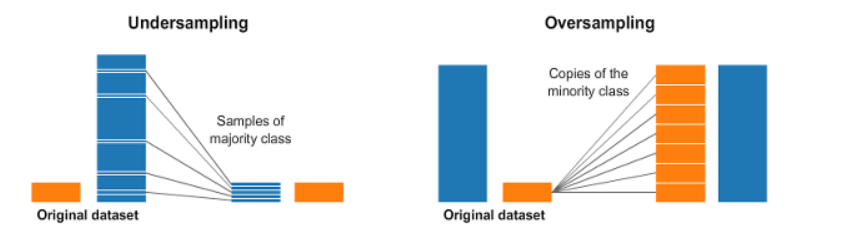

Despite the advantage of balancing classes, these techniques also have their weaknesses (there is no free lunch).

The simplest implementation of over-sampling is to duplicate random records from the minority class, which can cause overfishing.

In under-sampling, the simplest technique involves removing random records from the majority class, which can cause a loss of information.

#### We will be separating the class that are 0 and class 1

In [64]:
df.head()

,amt,city_pop,is_fraud,age,hour,day,month,latitudinal_distance,longitudinal_distance,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_M
0,4,3495,0,36,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,107,149,0,46,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,220,4154,0,62,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,45,1939,0,57,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
4,41,99,0,38,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [65]:
df[df['is_fraud'] == 1]

,amt,city_pop,is_fraud,age,hour,day,month,latitudinal_distance,longitudinal_distance,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_M
2449,281,885,1,36,1,2,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
2472,11,1595797,1,64,1,2,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2523,276,1595797,1,64,3,2,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2546,7,885,1,36,3,2,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
2553,275,1595797,1,64,3,2,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295399,977,105638,1,38,1,6,6,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1295491,1210,105638,1,38,1,6,6,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1295532,10,71335,1,30,2,6,6,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
1295666,21,23,1,55,3,6,6,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [66]:
df['is_fraud'].value_counts()

is_fraud
0    1289169
1       7506
Name: count, dtype: int64

In [67]:
# class count
class_count_0, class_count_1 = df['is_fraud'].value_counts()

# Separate Class
class_0 = df[df['is_fraud'] == 0]
class_1 = df[df['is_fraud'] == 1]
print(f'class 0: {class_0.shape}, class 1: {class_1.shape}')

class 0: (1289169, 23), class 1: (7506, 23)


## 1. Random Under-Sampling

Undersampling can be defined as removing some observations of the majority class. This is done until the majority and minority class is balanced out.

Undersampling can be a good choice when you have a ton of data -think millions of rows. But a drawback to undersampling is that we are removing information that may be valuable.

In [69]:
class_count_1

7506

In [68]:
# Picking random sample based on the size of class 1 (minority class)
class_0_under = class_0.sample(class_count_1,random_state=0)

# concatenating class 0 and class 1
test_under = pd.concat([class_0_under,class_1],axis = 0)
test_under = test_under.reset_index(drop=True)

print(f'Total no of class 0 and class 1 : {test_under["is_fraud"].value_counts()}')

Total no of class 0 and class 1 : is_fraud
0    7506
1    7506
Name: count, dtype: int64


In [74]:
df

,amt,city_pop,is_fraud,age,hour,day,month,latitudinal_distance,longitudinal_distance,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_M
0,4,3495,0,36,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,107,149,0,46,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,220,4154,0,62,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,45,1939,0,57,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
4,41,99,0,38,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,15,258,0,63,12,6,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1296671,51,100,0,45,12,6,6,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1296672,105,899,0,57,12,6,6,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1296673,74,1126,0,44,12,6,6,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1


### Model building using Random Under-Sampling Manual

In [94]:
# Create and train a Logistic Regression on the Random Under-Sampling data

X = test_under.drop('is_fraud',axis = 1)
y = test_under['is_fraud']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

# Train Logistic Regression
lr_rusm = LogisticRegression()
lr_rusm.fit(X_train, y_train)

# Predict on the original test set
y_lr_pred = lr_rusm.predict(X_test)

# Evaluate Logistic Regression performance
print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_lr_pred))
print("Classification Report:\n", classification_report(y_test, y_lr_pred))

# Train Decision Tree
dt_rusm = DecisionTreeClassifier()
dt_rusm.fit(X_train, y_train)

# Predict on the original test set
y_dt_pred = dt_rusm.predict(X_test)

# Evaluate Logistic Regression performance
print("Decision Tree:")
print("Accuracy:", accuracy_score(y_test, y_dt_pred))
print("Classification Report:\n", classification_report(y_test, y_dt_pred))

# Train Random Forest Classifier
rf_rusm = RandomForestClassifier()
rf_rusm.fit(X_train, y_train)

# Predict on the original test set
y_rf_pred = rf_rusm.predict(X_test)

# Evaluate Random Forest performance
print("Random Forest:")
print("Accuracy:", accuracy_score(y_test, y_rf_pred))
print("Classification Report:\n", classification_report(y_test, y_rf_pred))



Logistic Regression:
Accuracy: 0.8450266429840142
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.94      0.86      2221
           1       0.93      0.75      0.83      2283

    accuracy                           0.85      4504
   macro avg       0.86      0.85      0.84      4504
weighted avg       0.86      0.85      0.84      4504

Decision Tree:
Accuracy: 0.9635879218472468
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96      2221
           1       0.96      0.96      0.96      2283

    accuracy                           0.96      4504
   macro avg       0.96      0.96      0.96      4504
weighted avg       0.96      0.96      0.96      4504

Random Forest:
Accuracy: 0.9740230905861457
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.97      2221
           1       0.98    

### 2. Random Over-Sampling

Oversampling can be defined as adding more copies to the minority class. Oversampling can be a good choice when you don’t have a ton of data to work with.

A con to consider when OverSampling is that it can cause overfitting and poor generalization to your test set.

In [95]:
# Adding random samples based on the size of the class 0 (majority class)
class_1_over = class_1.sample(class_count_0,replace = True)

# concatenating class 0 and class 1
test_over = pd.concat([class_1_over, class_0], axis=0)
test_over = test_over.reset_index(drop=True)

print(f'Total no of class 0 and class 1 : {test_over["is_fraud"].value_counts()}')

Total no of class 0 and class 1 : is_fraud
1    1289169
0    1289169
Name: count, dtype: int64


### Model building using Random Over-Sampling Manual

In [96]:
# Create and train a Logistic Regression on the Random Under-Sampling data

X = test_over.drop('is_fraud',axis = 1)
y = test_over['is_fraud']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

# Train Logistic Regression
lr_rusm = LogisticRegression()
lr_rusm.fit(X_train, y_train)

# Predict on the original test set
y_lr_pred = lr_rusm.predict(X_test)

# Evaluate Logistic Regression performance
print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_lr_pred))
print("Classification Report:\n", classification_report(y_test, y_lr_pred))

# Train Decision Tree
dt_rusm = DecisionTreeClassifier()
dt_rusm.fit(X_train, y_train)

# Predict on the original test set
y_dt_pred = dt_rusm.predict(X_test)

# Evaluate Logistic Regression performance
print("Decision Tree:")
print("Accuracy:", accuracy_score(y_test, y_dt_pred))
print("Classification Report:\n", classification_report(y_test, y_dt_pred))

# Train Random Forest Classifier
rf_rusm = RandomForestClassifier()
rf_rusm.fit(X_train, y_train)

# Predict on the original test set
y_rf_pred = rf_rusm.predict(X_test)

# Evaluate Random Forest performance
print("Random Forest:")
print("Accuracy:", accuracy_score(y_test, y_rf_pred))
print("Classification Report:\n", classification_report(y_test, y_rf_pred))



Logistic Regression:
Accuracy: 0.840483928936189
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.93      0.85    386929
           1       0.92      0.75      0.82    386573

    accuracy                           0.84    773502
   macro avg       0.85      0.84      0.84    773502
weighted avg       0.85      0.84      0.84    773502

Decision Tree:
Accuracy: 0.9994777001223009
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    386929
           1       1.00      1.00      1.00    386573

    accuracy                           1.00    773502
   macro avg       1.00      1.00      1.00    773502
weighted avg       1.00      1.00      1.00    773502

Random Forest:
Accuracy: 0.9998073695995615
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    386929
           1       1.00     

### Now will balance the dataset with the Imbalanced-Learn Python Module

we can cluster the records of the majority class and do the under-sampling by removing records from each cluster, thus seeking to preserve information. In over-sampling, instead of creating exact copies of the minority class records, we can introduce small variations into those copies, creating more diverse synthetic samples.

### 3. Random Under-Sampling With Imblearn

RandomUnderSampler is a fast and easy way to balance the data by randomly selecting a subset of data for the targeted classes. Under-sample the majority class(es) by randomly picking samples with or without replacement.

In [97]:
X = df.drop('is_fraud',axis = 1)
y = df['is_fraud']

In [98]:
import imblearn
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=0, replacement=True)# fit predictor and target variable
x_rus, y_rus = rus.fit_resample(X, y)

print('original dataset shape:', y.value_counts())
print('Resample dataset shape', y_rus.value_counts())

original dataset shape: is_fraud
0    1289169
1       7506
Name: count, dtype: int64
Resample dataset shape is_fraud
0    7506
1    7506
Name: count, dtype: int64


In [99]:
X_train,X_test,y_train,y_test = train_test_split(x_rus,y_rus,test_size=0.3,random_state=0)

# Train Logistic Regression
lr_rusm = LogisticRegression()
lr_rusm.fit(X_train, y_train)

# Predict on the original test set
y_lr_pred = lr_rusm.predict(X_test)

# Evaluate Logistic Regression performance
print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_lr_pred))
print("Classification Report:\n", classification_report(y_test, y_lr_pred))

# Train Decision Tree
dt_rusm = DecisionTreeClassifier()
dt_rusm.fit(X_train, y_train)

# Predict on the original test set
y_dt_pred = dt_rusm.predict(X_test)

# Evaluate Logistic Regression performance
print("Decision Tree:")
print("Accuracy:", accuracy_score(y_test, y_dt_pred))
print("Classification Report:\n", classification_report(y_test, y_dt_pred))

# Train Random Forest Classifier
rf_rusm = RandomForestClassifier()
rf_rusm.fit(X_train, y_train)

# Predict on the original test set
y_rf_pred = rf_rusm.predict(X_test)

# Evaluate Random Forest performance
print("Random Forest:")
print("Accuracy:", accuracy_score(y_test, y_rf_pred))
print("Classification Report:\n", classification_report(y_test, y_rf_pred))



Logistic Regression:
Accuracy: 0.8403641207815276
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.93      0.85      2221
           1       0.92      0.75      0.83      2283

    accuracy                           0.84      4504
   macro avg       0.85      0.84      0.84      4504
weighted avg       0.85      0.84      0.84      4504

Decision Tree:
Accuracy: 0.9684724689165186
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.97      2221
           1       0.97      0.96      0.97      2283

    accuracy                           0.97      4504
   macro avg       0.97      0.97      0.97      4504
weighted avg       0.97      0.97      0.97      4504

Random Forest:
Accuracy: 0.9733570159857904
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.97      2221
           1       0.98    

### 4. Random Over-Sampling With imblearn

In [100]:
X = df.drop('is_fraud',axis = 1)
y = df['is_fraud']

In [101]:
import imblearn
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=0)
x_ros, y_ros = ros.fit_resample(X, y)

print('original dataset shape:', y.value_counts())
print('Resample dataset shape', y_ros.value_counts())

original dataset shape: is_fraud
0    1289169
1       7506
Name: count, dtype: int64
Resample dataset shape is_fraud
0    1289169
1    1289169
Name: count, dtype: int64


In [102]:
X_train,X_test,y_train,y_test = train_test_split(x_ros,y_ros,test_size=0.3,random_state=0)

# Train Logistic Regression
lr_rusm = LogisticRegression()
lr_rusm.fit(X_train, y_train)

# Predict on the original test set
y_lr_pred = lr_rusm.predict(X_test)

# Evaluate Logistic Regression performance
print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_lr_pred))
print("Classification Report:\n", classification_report(y_test, y_lr_pred))

# Train Decision Tree
dt_rusm = DecisionTreeClassifier()
dt_rusm.fit(X_train, y_train)

# Predict on the original test set
y_dt_pred = dt_rusm.predict(X_test)

# Evaluate Logistic Regression performance
print("Decision Tree:")
print("Accuracy:", accuracy_score(y_test, y_dt_pred))
print("Classification Report:\n", classification_report(y_test, y_dt_pred))

# Train Random Forest Classifier
rf_rusm = RandomForestClassifier()
rf_rusm.fit(X_train, y_train)

# Predict on the original test set
y_rf_pred = rf_rusm.predict(X_test)

# Evaluate Random Forest performance
print("Random Forest:")
print("Accuracy:", accuracy_score(y_test, y_rf_pred))
print("Classification Report:\n", classification_report(y_test, y_rf_pred))



Logistic Regression:
Accuracy: 0.841559556407094
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.94      0.86    386589
           1       0.92      0.75      0.83    386913

    accuracy                           0.84    773502
   macro avg       0.85      0.84      0.84    773502
weighted avg       0.85      0.84      0.84    773502

Decision Tree:
Accuracy: 0.9993962523690954
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    386589
           1       1.00      1.00      1.00    386913

    accuracy                           1.00    773502
   macro avg       1.00      1.00      1.00    773502
weighted avg       1.00      1.00      1.00    773502

Random Forest:
Accuracy: 0.9998164193499176
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    386589
           1       1.00     

### 5. Under-Sampling: Tomek Links

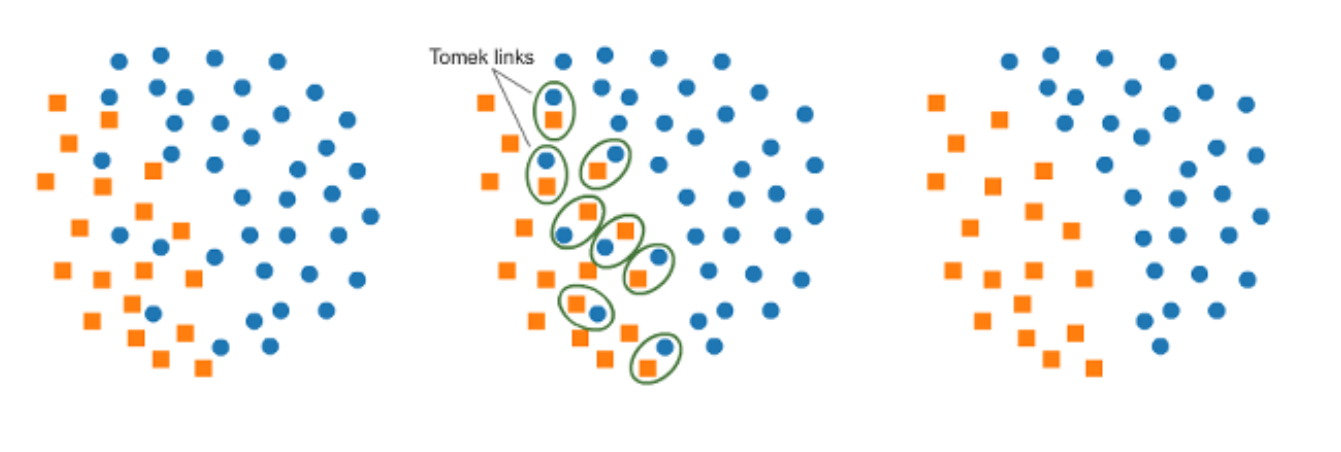
- Tomek Links are pairs of very close instances that belong to different classes.        
- They're samples near the borderline between classes.       
- By removing the examples of the majority class of each pair, we increase the space between the two classes and move toward balancing the dataset by deleting those points.

In [ ]:
X = df.drop('is_fraud',axis = 1)
y = df['is_fraud']

In [ ]:
from imblearn.under_sampling import TomekLinks

tl = TomekLinks(sampling_strategy='majority')
x_tl, y_tl = tl.fit_resample(X, y)
print('Original dataset shape:', y.value_counts())
print('Resampled dataset shape after Tomek links:', y_tl.value_counts())

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(x_tl,y_tl,test_size=0.3,random_state=0)

# Train Logistic Regression
lr_rusm = LogisticRegression()
lr_rusm.fit(X_train, y_train)

# Predict on the original test set
y_lr_pred = lr_rusm.predict(X_test)

# Evaluate Logistic Regression performance
print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_lr_pred))
print("Classification Report:\n", classification_report(y_test, y_lr_pred))

# Train Decision Tree
dt_rusm = DecisionTreeClassifier()
dt_rusm.fit(X_train, y_train)

# Predict on the original test set
y_dt_pred = dt_rusm.predict(X_test)

# Evaluate Logistic Regression performance
print("Decision Tree:")
print("Accuracy:", accuracy_score(y_test, y_dt_pred))
print("Classification Report:\n", classification_report(y_test, y_dt_pred))

# Train Random Forest Classifier
rf_rusm = RandomForestClassifier()
rf_rusm.fit(X_train, y_train)

# Predict on the original test set
y_rf_pred = rf_rusm.predict(X_test)

# Evaluate Random Forest performance
print("Random Forest:")
print("Accuracy:", accuracy_score(y_test, y_rf_pred))
print("Classification Report:\n", classification_report(y_test, y_rf_pred))



### 6. Synthetic Minority Oversampling Technique (SMOTE)

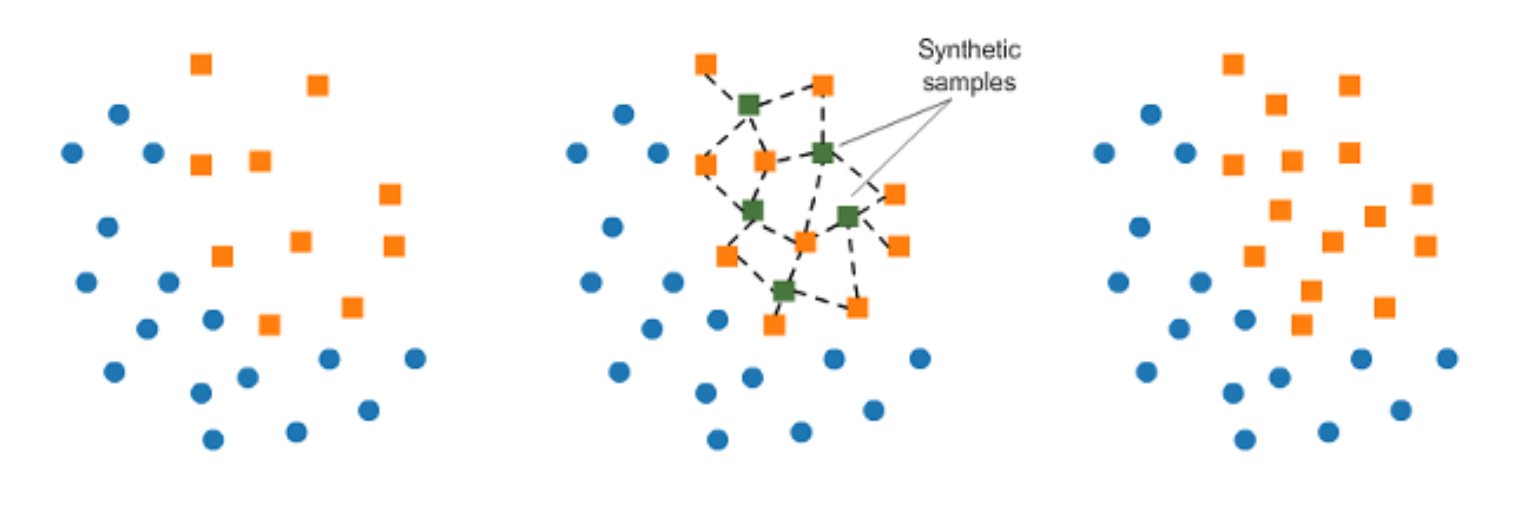

This technique generates synthetic data for the minority class.

SMOTE (Synthetic Minority Oversampling Technique) works by randomly picking a point from the minority class and computing the k-nearest neighbors for this point.The synthetic points are added between the chosen point and its neighbors.

In [103]:
X = df.drop('is_fraud',axis = 1)
y = df['is_fraud']

In [104]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
x_smote, y_smote = smote.fit_resample(X, y)
print('Original dataset shape:', y.value_counts())
print('Resampled dataset shape after Tomek links:', y_smote.value_counts())

Original dataset shape: is_fraud
0    1289169
1       7506
Name: count, dtype: int64
Resampled dataset shape after Tomek links: is_fraud
0    1289169
1    1289169
Name: count, dtype: int64


In [105]:
X_train,X_test,y_train,y_test = train_test_split(x_smote, y_smote,test_size=0.3,random_state=0)

# Train Logistic Regression
lr_rusm = LogisticRegression()
lr_rusm.fit(X_train, y_train)

# Predict on the original test set
y_lr_pred = lr_rusm.predict(X_test)

# Evaluate Logistic Regression performance
print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_lr_pred))
print("Classification Report:\n", classification_report(y_test, y_lr_pred))

# Train Decision Tree
dt_rusm = DecisionTreeClassifier()
dt_rusm.fit(X_train, y_train)

# Predict on the original test set
y_dt_pred = dt_rusm.predict(X_test)

# Evaluate Logistic Regression performance
print("Decision Tree:")
print("Accuracy:", accuracy_score(y_test, y_dt_pred))
print("Classification Report:\n", classification_report(y_test, y_dt_pred))

# Train Random Forest Classifier
rf_rusm = RandomForestClassifier()
rf_rusm.fit(X_train, y_train)

# Predict on the original test set
y_rf_pred = rf_rusm.predict(X_test)

# Evaluate Random Forest performance
print("Random Forest:")
print("Accuracy:", accuracy_score(y_test, y_rf_pred))
print("Classification Report:\n", classification_report(y_test, y_rf_pred))



Logistic Regression:
Accuracy: 0.8448588368226585
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.93      0.86    386589
           1       0.92      0.76      0.83    386913

    accuracy                           0.84    773502
   macro avg       0.86      0.84      0.84    773502
weighted avg       0.86      0.84      0.84    773502

Decision Tree:
Accuracy: 0.9951945825608725
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00    386589
           1       0.99      1.00      1.00    386913

    accuracy                           1.00    773502
   macro avg       1.00      1.00      1.00    773502
weighted avg       1.00      1.00      1.00    773502

Random Forest:
Accuracy: 0.9970471957409289
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    386589
           1       1.00    